# Labelled Data (.mat)

In [ ]:
# library used
!pip install h5py

In [ ]:
# imports and google drive mounting, need to first create shortcut to
# shared folder APS360_Project in your own drive

import torch
from matplotlib import pyplot as plt
from scipy import ndimage
import numpy as np
import h5py
from google.colab import drive
drive.mount('/content/gdrive')

# read file in h5py.File object
f = h5py.File('/content/gdrive/My Drive/APS360_Project/Data/nyu_depth_v2_labeled.mat','r')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# f is a dictionary of arrays, data types included are printed here
print(list(f.keys()))

# read RGB images data into 4D numpy array and swap axes to
# move colour channels to last axis
images = np.array(f["images"][:])
images = np.swapaxes(images, 1, 3)

# read depth data into 3D numpy array and flip axis 1 to mirror
# image horizontally (to match RGB images)
depths = np.array(f["depths"][:])
depths = np.flip(depths, 1)



['#refs#', '#subsystem#', 'accelData', 'depths', 'images', 'instances', 'labels', 'names', 'namesToIds', 'rawDepthFilenames', 'rawDepths', 'rawRgbFilenames', 'sceneTypes', 'scenes']


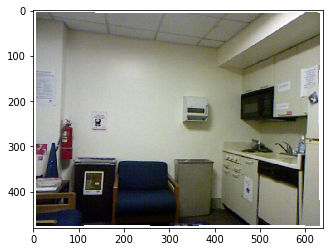

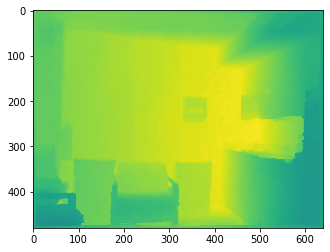

In [ ]:
# get first RGB and first depth image
# depth image must be also rotated by -90 degrees
image0 = images[0]
depth0 = ndimage.rotate(input=depths[0], angle=-90)

#display both images
plt.imshow(image0, interpolation='none')
plt.show()
plt.imshow(depth0, interpolation='none')
plt.show()

# Unlabeled Data (.pgm and .ppm)